In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynetlogo
import numpy as np
import pynetlogo
import pysd as sd

In [82]:
sns.set_style("white")
sns.set_context("talk")

netlogo = pynetlogo.NetLogoLink(
    gui=True,
    #netlogo_home = "/Applications/NetLogo 6.0.3",
    jvm_path="...", #Use file path for Netlogo
    )

In [1]:
"Baseline"

netlogo.load_model("....nlogo") #Use file path for Netlogo model
netlogo.command("setup")


SDmodel = sd.pysd.read_xmile("....stmx") #Use file path for Stella model
BL = pd.read_csv("....csv") #Use file path for simulation output
Clusters = pd.read_csv('clusters.csv') #Use file path for cluster csv

ABMresults = netlogo.repeat_report(["total-farms","cease-farming-prob"], 10, go="go")
results = pd.DataFrame(ABMresults)
ABMresultsDF=pd.DataFrame()
years=2
t = 1
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]

while t < years+1:
    "ABM Model"
    ABMresults = netlogo.repeat_report(["total-farms","cease-farming-prob"], 1, go="go")
    ABMresultsDF = pd.DataFrame(ABMresults)
    NumFarms=round(ABMresultsDF.iat[1,0],2)
    results = results._append(ABMresultsDF.iloc[1], ignore_index=True)

    "Results per agent"

    FarmerID=netlogo.repeat_report(["[farm-id] of farms"], 1, go="go")
    Income = netlogo.repeat_report(["[current-income] of farms"], 1, go="go")
    Farmsize=netlogo.repeat_report(["[num-beef-cows] of farms"], 1, go="go")

    "convert to data frame"
    FarmerIDdf=pd.DataFrame.from_dict(FarmerID)
    Incomedf= pd.DataFrame.from_dict(Income)
    Farmsizedf=pd.DataFrame.from_dict(Farmsize)
    
    row_listID = FarmerIDdf.loc[0, :].values.flatten().tolist()
    arrID = np.array(row_listID)
    dataID = pd.DataFrame(arrID)
    transposed_ID = dataID.transpose()
    transposed_ID.rename( columns={0 :'ID'}, inplace=True )
    first_row = transposed_ID.head(100)
    first_row

    row_listI = Incomedf.loc[0, :].values.flatten().tolist()
    arrI = np.array(row_listI)
    dataI = pd.DataFrame(arrI)
    transposed_Income = dataI.transpose()
    transposed_Income.rename( columns={0 :'Income'}, inplace=True )
    first_row = transposed_Income.head(100)
    first_row

    row_listS = Farmsizedf.loc[0, :].values.flatten().tolist()
    arrS = np.array(row_listS)
    dataS = pd.DataFrame(arrS)
    transposed_Farmsize = dataS.transpose()
    transposed_Farmsize.rename( columns={0 :'NmCows'}, inplace=True )
    first_row = transposed_Farmsize.head(100)
    first_row

    combined = pd.concat([transposed_ID,transposed_Income, transposed_Farmsize], axis="columns")
    combined.head(10)

    combined['ID'] = pd.to_numeric(combined['ID'])

    combined=combined.merge(Clusters, left_on='ID', right_on='FarmerID')

    cluster1.append(sum(combined.k5cls == 1))
    cluster2.append(sum(combined.k5cls == 2))
    cluster3.append(sum(combined.k5cls == 3))
    cluster4.append(sum(combined.k5cls == 4))
    
    "SD Model"
    ProbVector = SDmodel.run(params={'Number of farms':NumFarms },return_columns=['cease-farming-prob'])
    Prob=round(ProbVector.iat[4,0],2)
    "ABM Model"
    netlogo.command('set cease-farming-prob {0}'.format(Prob))
    t += 1

summaryclusters = pd.DataFrame(
{'cluster1': cluster1,
'cluster2': cluster2,
'cluster3': cluster3,
'cluster4': cluster4
})



NameError: name 'netlogo' is not defined

<Axes: xlabel='Year'>

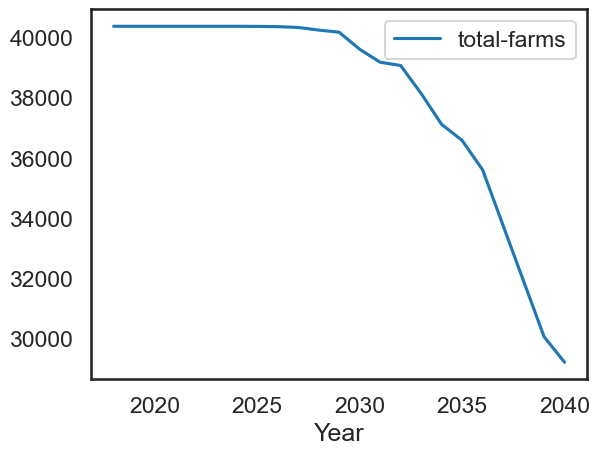

In [86]:
"Scenario"

netlogo.load_model("....nlogo") #Use file path for Netlogo model
netlogo.command("setup")


SDmodel = sd.pysd.read_xmile("....stmx") #Use file path for Stella model
BL = pd.read_csv("....csv") #Use file path for simulation output
Clusters = pd.read_csv('clusters.csv') #Use file path for cluster csv

ABMresults = netlogo.repeat_report(["total-farms","cease-farming-prob"], 10, go="go")
results = pd.DataFrame(ABMresults)
ABMresultsDF=pd.DataFrame()
years=2
t = 1
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]

while t < years+1:
    "ABM Model"
    ABMresults = netlogo.repeat_report(["total-farms","cease-farming-prob"], 1, go="go")
    ABMresultsDF = pd.DataFrame(ABMresults)
    NumFarms=round(ABMresultsDF.iat[1,0],2)
    results = results._append(ABMresultsDF.iloc[1], ignore_index=True)

    "Results per agent"

    FarmerID=netlogo.repeat_report(["[farm-id] of farms"], 1, go="go")
    Income = netlogo.repeat_report(["[current-income] of farms"], 1, go="go")
    Farmsize=netlogo.repeat_report(["[num-beef-cows] of farms"], 1, go="go")

    "convert to data frame"
    FarmerIDdf=pd.DataFrame.from_dict(FarmerID)
    Incomedf= pd.DataFrame.from_dict(Income)
    Farmsizedf=pd.DataFrame.from_dict(Farmsize)
    
    row_listID = FarmerIDdf.loc[0, :].values.flatten().tolist()
    arrID = np.array(row_listID)
    dataID = pd.DataFrame(arrID)
    transposed_ID = dataID.transpose()
    transposed_ID.rename( columns={0 :'ID'}, inplace=True )
    first_row = transposed_ID.head(100)
    first_row

    row_listI = Incomedf.loc[0, :].values.flatten().tolist()
    arrI = np.array(row_listI)
    dataI = pd.DataFrame(arrI)
    transposed_Income = dataI.transpose()
    transposed_Income.rename( columns={0 :'Income'}, inplace=True )
    first_row = transposed_Income.head(100)
    first_row

    row_listS = Farmsizedf.loc[0, :].values.flatten().tolist()
    arrS = np.array(row_listS)
    dataS = pd.DataFrame(arrS)
    transposed_Farmsize = dataS.transpose()
    transposed_Farmsize.rename( columns={0 :'NmCows'}, inplace=True )
    first_row = transposed_Farmsize.head(100)
    first_row

    combined = pd.concat([transposed_ID,transposed_Income, transposed_Farmsize], axis="columns")
    combined.head(10)

    combined['ID'] = pd.to_numeric(combined['ID'])

    combined=combined.merge(Clusters, left_on='ID', right_on='FarmerID')

    cluster1.append(sum(combined.k5cls == 1))
    cluster2.append(sum(combined.k5cls == 2))
    cluster3.append(sum(combined.k5cls == 3))
    cluster4.append(sum(combined.k5cls == 4))
    
    "SD Model"
    ProbVector = SDmodel.run(params={'Number of farms':NumFarms },return_columns=['cease-farming-prob'])
    Prob=round(ProbVector.iat[4,0],2)
    "ABM Model"
    netlogo.command('set cease-farming-prob {0}'.format(Prob))
    t += 1

summaryclusters = pd.DataFrame(
{'cluster1': cluster1,
'cluster2': cluster2,
'cluster3': cluster3,
'cluster4': cluster4
})


In [65]:
results.to_csv('results.csv', index=False)  